In [1]:
########### FACTOR ################
Mamiferos.data <- read.table(file = "http://tarwi.lamolina.edu.pe/~clopez/Regresion/Mamiferos.txt", header = T)
attach(Mamiferos.data)
head(Mamiferos.data)


SWS,PS,TS,PesoCuerpo,PesoCerebro,Life,GP,P,SE,D,Especie
NA,NA,3.3,6654.000,5712.0,38.6,645,3,5,3,African_elephant
6.3,2.0,8.3,1.000,6.6,4.5,42,3,1,3,African_giant_pouched_rat
NA,NA,12.5,3.385,44.5,14.0,60,1,1,1,Arctic_Fox
NA,NA,16.5,0.920,5.7,NA,25,5,2,3,Arctic_ground_squirrel
2.1,1.8,3.9,2547.000,4603.0,69.0,624,3,5,4,Asian_elephant
9.1,0.7,9.8,10.550,179.5,27.0,180,4,4,4,Baboon


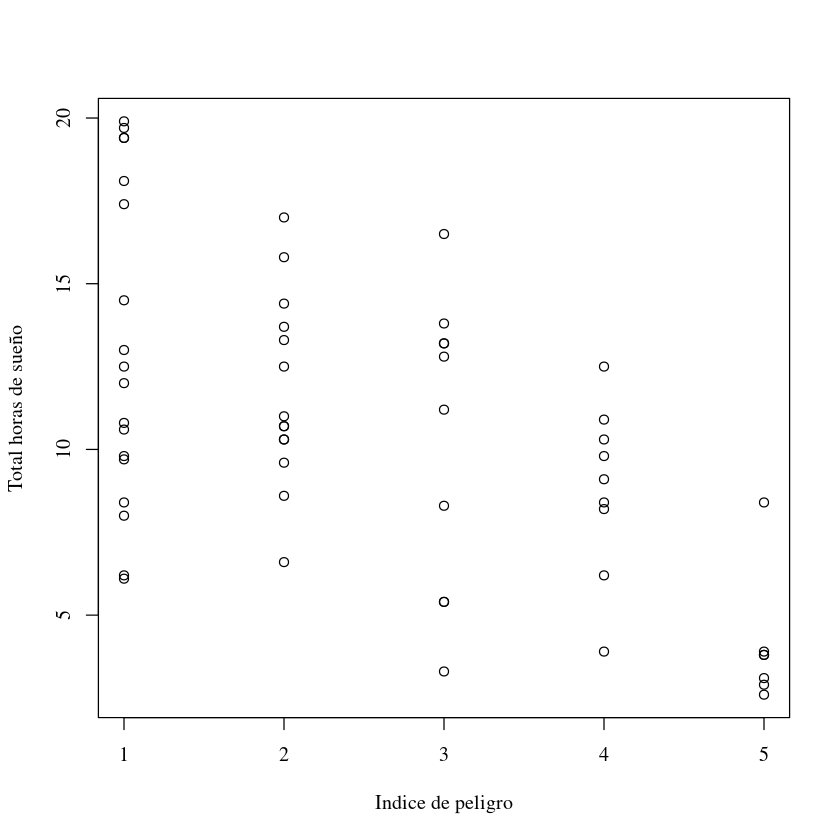

In [2]:
# Graficamos los datos
plot(D, TS, xlab = "Indice de peligro", ylab = "Total horas de sueño")

In [3]:
# Convertimos la variable D como FACTOR
D <- as.factor(D)

In [4]:
# Calculamos los valores de D
Mamiferos.m1 <- lm(TS ~ D)
coef(Mamiferos.m1)

(Intercept)          D2          D3          D4          D5 
  13.083333   -1.333333   -2.773333   -4.272222   -9.011905

In [6]:
# El modelo seria
#         TS = 13.083 -1.333*D2 -2.773*D3 -4.272*D4 - 9.012*D5

# Calculemos el valor de TS para D=1  --- TS es Muy poco
predict(Mamiferos.m1, data.frame(D="1"))

1 
13.08333

In [7]:
# Calculemos el valor de TS para D=2  -- TS es Poco
predict(Mamiferos.m1, data.frame(D="2"))

1 
11.75

In [8]:
# Creamos el mismo modelo sin intercepto
#
Mamiferos.m2 <- lm(TS ~ -1 + D)
coef(Mamiferos.m2)


D1        D2        D3        D4        D5 
13.083333 11.750000 10.310000  8.811111  4.071429

In [ ]:
# El modelo seria
#         TS = 13.083*D1 +1.75*D2 + 10.31*D3 + 8.811*D4 + 4.071*D5

# si tenemos un interceptos en el modelo tiene ventaja, tendrias el coeficiente de determinacion, 
# los residuales no tendrian el comportamiento normal
# se recomienda sacrificar un variable dummy para que exista el intercepto.

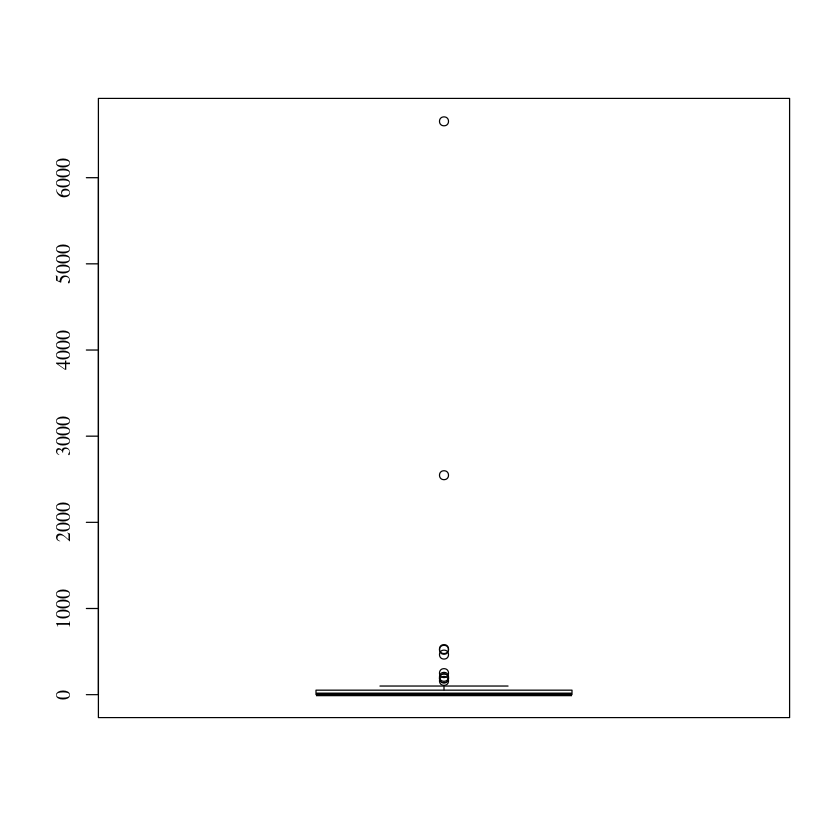

In [9]:
# Creamos una variable de cajas para la
# columna PesoCuerpo

boxplot(PesoCuerpo)

# Se observa que la  la dispersion es demasiado notoria

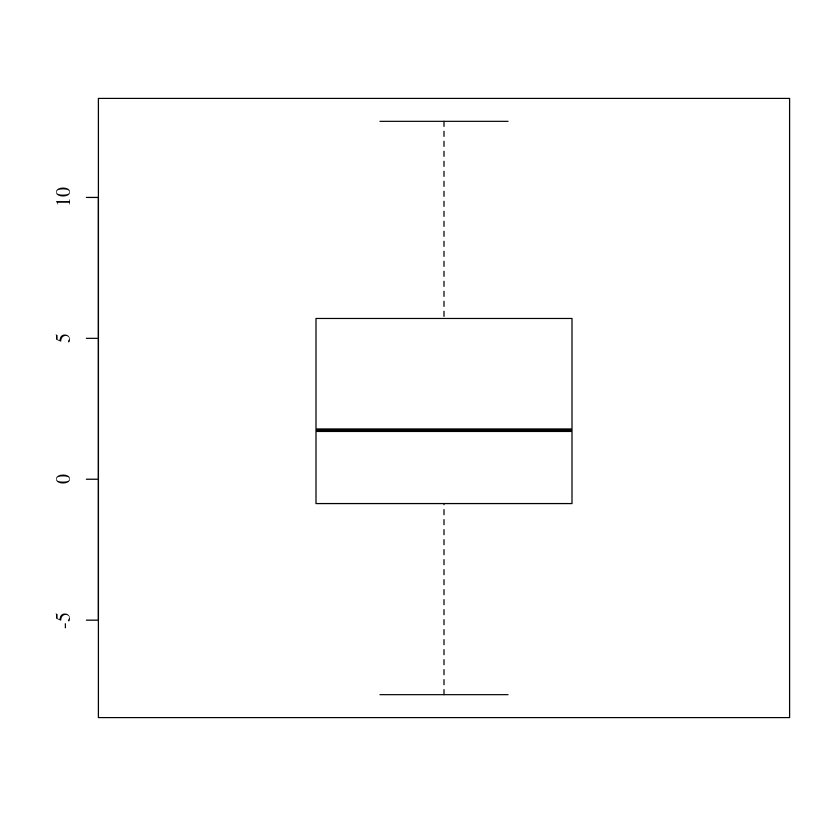

In [10]:
# Aplicamos el logaritmo en base 2

x <- logb(PesoCuerpo,2)
boxplot(x)

# Se observa una distribucion mas equilibrada

In [11]:
############################################################
#                 Modelo 1 : "Mas General"
#   Es un conjuntos de rectas que es empaquetado en 
#    una sola ecuación
############################################################

x <- logb(PesoCuerpo,2) ## ya se habia calculado, se vuelve a usar
Mamiferos.n1 <- lm(TS ~ D + D*x)
coef(Mamiferos.n1)

(Intercept)          D2          D3          D4          D5           x 
13.86818223 -2.35924292 -3.50086642 -4.22738075 -7.03108292 -0.40274346 
       D2:x        D3:x        D4:x        D5:x 
-0.02388549 -0.23869576  0.11760239 -0.06680545

In [12]:
#
# TS = 13.86818223 - 2.359242922*D2 - 3.50086642*D3 - 4.227380751*D4 - 7.031082924*D5 - 0.402743461*x
#     - 0.023885486*D2*x - 0.238695762*D3*x + 0.117602386*D4*x - 0.06680545*D5*x
#
# D = 1  ==>  TS = 13.86818223 - 0.402743461*x
#
#
#
# El modelo tiene 10 parametros estimados

# Para predecir un valor
predict(Mamiferos.n1, data.frame(D="2", x=5))

1 
9.375795

In [13]:
############################################################
#                 Modelo 2: "Rectas Paralelas"
#   Es un conjuntos de rectas que es empaquetado en 
#   una sola ecuación, pero tienen la misma pendiente
############################################################
Mamiferos.n2 <- lm(TS ~ D + x)
coef(Mamiferos.n2)


(Intercept)          D2          D3          D4          D5           x 
  13.932502   -2.428716   -3.583566   -3.853468   -7.294486   -0.435749

In [ ]:
#
# TS = 13.9325020014493 -2.42871586251691*D2 - 3.58356564641954*D3 - 3.85346849289951*D4 - 7.29448609909114*D5 - 0.435749011273047*x
#
#  D = 1    ==> TS = 13.9325020014493                      - 0.435749011273047*x
#  D = 2    ==> TS = (13.9325020014493 - 2.42871586251691) - 0.435749011273047*x
#  D = 3    ==> TS = (13.9325020014493 - 3.58356564641954) - 0.435749011273047*x
#  D = 4    ==> TS = (13.9325020014493 - 3.85346849289951) - 0.435749011273047*x
#  D = 4    ==> TS = (13.9325020014493 - 7.29448609909114) - 0.435749011273047*x
#



In [14]:
############################################################
#                 Modelo 3: "Intercepto Común"
#   Es un conjuntos de rectas que es empaquetado en 
#   una sola ecuación, pero tienen el mismo intercepto
############################################################
Mamiferos.n3 <- lm(TS ~ x + x:D)
coef(Mamiferos.n3)

(Intercept)           x        x:D2        x:D3        x:D4        x:D5 
 11.6258529  -0.2004724  -0.2105761  -0.4458769  -0.2441391  -0.9491168

In [ ]:
#
# TS = 11.6258528797202 -0.200472438216469*x - 0.210576066788876*x*D2 - 0.44587692380633*x*D3 - 0.244139056297243*x*D4 - 0.949116768310321*x*D5
#
#  D = 1    ==> TS = 11.6258528797202 - (0.200472438216469)*x
#  D = 2    ==> TS = 11.6258528797202 - (0.200472438216469 + 0.210576066788876)*x
#  D = 3    ==> TS = 11.6258528797202 - (0.200472438216469 + 0.44587692380633)*x
#  D = 4    ==> TS = 11.6258528797202 - (0.200472438216469 + 0.244139056297243)*x
#  D = 4    ==> TS = 11.6258528797202 - (0.200472438216469 + 0.949116768310321)*x
#

In [15]:
############################################################
#       Modelo 4: "Líneas de regresión coincidentes"
#   Es un conjuntos de rectas que es empaquetado en 
#   una sola ecuación, pero tienen la misma 
#   pendiente e intercepto
############################################################
Mamiferos.n4 <- lm(TS ~ x )
coef(Mamiferos.n4)

(Intercept)           x 
 11.4377412  -0.5497446

In [ ]:
#
# D = 1,2,3,4,5 ==> TS = 11.4377412358963 -0.549744647364136*x
#

# Los modelos que tiene indicadores no se pueden comparar con la funcion ANOVA, no es recomendable
# porque en el ANOVA se compara modelos que contienen a otros, para este caso concreto no necesariamente
# los modelos estan contenidos en otros.

In [19]:
#############################################################
#  Comparación de modelos con parametros
#  Se usa el indicador AIC : Criterio de información de Akaite
#  El mejor modelo es el que tiene el menor valor para 
#  este indicador
#############################################################

sprintf("AIC(Mamiferos.n1) = %f", AIC(Mamiferos.n1))
sprintf("AIC(Mamiferos.n2) = %f", AIC(Mamiferos.n2))
sprintf("AIC(Mamiferos.n3) = %f", AIC(Mamiferos.n3))
sprintf("AIC(Mamiferos.n4) = %f", AIC(Mamiferos.n4))


[1] "AIC(Mamiferos.n1) = 318.673891"

[1] "AIC(Mamiferos.n2) = 312.268324"

[1] "AIC(Mamiferos.n3) = 323.835050"

[1] "AIC(Mamiferos.n4) = 327.411757"

In [20]:
# El modelo adecuado es el Modelo Paralelo porque el valor de 
# AIC es el menor, pero no es el mejor, se debe calcular el 
# coeficiente de determinacion.

# Calcular el coeficiente de determinación
summary(Mamiferos.n2)



Call:
lm(formula = TS ~ D + x)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6165 -1.8447 -0.0214  1.9043  6.7414 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.9325     0.8173  17.046  < 2e-16 ***
D2           -2.4287     1.2238  -1.985 0.052479 .  
D3           -3.5836     1.3347  -2.685 0.009714 ** 
D4           -3.8535     1.3691  -2.815 0.006879 ** 
D5           -7.2945     1.5525  -4.699 1.96e-05 ***
x            -0.4357     0.1113  -3.914 0.000266 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.343 on 52 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5195,	Adjusted R-squared:  0.4733 
F-statistic: 11.25 on 5 and 52 DF,  p-value: 2.23e-07


In [ ]:
# Multiple R-squared:  0.5195, ==> UN VALOR ADECUADO SERIA MAYOR A 0.75

In [ ]:
#############################################################
#  Consideraciones para la comparación de modelos
#                                                         
#  1.- Si tiene el mismo número de parametros 
#      se usa el "R cuadrado"
#  
#  2.- Si se tiene diferente números de parametros
#      "R cuadrado ajustado"  --> el mejor modelo es que
#                                  el tiene el mayor valor
#
#      AIC, BIC, Cp, etc      --> el mejor modelo es el 
#                                 que tiene el menor valor
#############################################################

In [21]:
# Cambiar la categoria referencial
m1 <- lm(TS ~ D)
m1


Call:
lm(formula = TS ~ D)

Coefficients:
(Intercept)           D2           D3           D4           D5  
     13.083       -1.333       -2.773       -4.272       -9.012  


In [23]:
# Cambiamos el nivel referencial
#
D <- relevel(D, ref="2")

# Volvemos a generar el modelo
m1 <- lm(TS ~ D)
m1


Call:
lm(formula = TS ~ D)

Coefficients:
(Intercept)           D1           D3           D4           D5  
     11.750        1.333       -1.440       -2.939       -7.679  


In [24]:
# Volvemos a su nivel original
#
D <- relevel(D, ref="1")

# Volvemos a generar el modelo
m1 <- lm(TS ~ D)
m1


Call:
lm(formula = TS ~ D)

Coefficients:
(Intercept)           D2           D3           D4           D5  
     13.083       -1.333       -2.773       -4.272       -9.012  
